In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
# import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Neural Network Implemntation for MNIST:

![Alt text for the image](nn-11.jpg)

---

## **1. Initialisation of the Weights and the Biases**

### **Weights and Biases**
We initialise the weights and biases for the neural network. For a simple two-layer network:
- **Input Layer**: Size = 784 (e.g., 28x28 image input like MNIST).
- **Hidden Layer**: Size = 10.
- **Output Layer**: Size = 10 (e.g., digits 0–9).

The parameters are:
- **Weights**: $W^{[1]}$, $W^{[2]}$ for layers 1 and 2.
- **Biases**: $b^{[1]}$, $b^{[2]}$ for layers 1 and 2.

### **Xavier Initialisation**
The weights are initialised using the Xavier method:
$$
W^{[1]} \sim \mathcal{N}(0, \sqrt{\frac{2}{\text{input size}}}), \quad W^{[2]} \sim \mathcal{N}(0, \sqrt{\frac{2}{\text{hidden size}}})
$$
Biases are initialised to zero:
$$
b^{[1]} = 0, \quad b^{[2]} = 0
$$

---

## **2. Forward Propagation**

Forward propagation calculates the output of the network given the inputs, by passing data through the layers.

### **Step 1: Input Layer**
The input data is a vector $X$ with shape $(m, n)$, where:
- $m$ is the number of samples.
- $n$ is the number of features (e.g., 784 for a 28x28 pixel image).

### **Step 2: Hidden Layer (Layer 1)**

#### **Weighted Input:**
The input $X$ is multiplied by the weights $W^{[1]}$ and added to the bias $b^{[1]}$:
$$
z^{[1]} = W^{[1]} X^T + b^{[1]}
$$
Where:
- $W^{[1]}$: Weight matrix for Layer 1 of size $(n_h, n)$.
- $b^{[1]}$: Bias vector for Layer 1 of size $(n_h, 1)$.
- $z^{[1]}$: Pre-activation (weighted input) for Layer 1.

#### **Activation:**
The weighted input $z^{[1]}$ is passed through an activation function (e.g., ReLU):
$$
a^{[1]} = g(z^{[1]})
$$
Where:
- $g$ is the activation function, such as $\text{ReLU}$:
  $$
  g(z) = \max(0, z)
  $$

### **Step 3: Output Layer (Layer 2)**

#### **Weighted Input:**
The activations from Layer 1 ($a^{[1]}$) are multiplied by the weights $W^{[2]}$ and added to the bias $b^{[2]}$:
$$
z^{[2]} = W^{[2]} a^{[1]} + b^{[2]}
$$
Where:
- $W^{[2]}$: Weight matrix for Layer 2 of size $(n_y, n_h)$.
- $b^{[2]}$: Bias vector for Layer 2 of size $(n_y, 1)$.
- $z^{[2]}$: Pre-activation (weighted input) for Layer 2.

#### **Activation (Softmax):**
The weighted input $z^{[2]}$ is passed through the softmax activation function:
$$
a^{[2]} = \text{Softmax}(z^{[2]})
$$
Where:
$$
\text{Softmax}(z_i) = \frac{\exp(z_i)}{\sum_j \exp(z_j)}
$$
This gives the output probabilities $a^{[2]}$, which represent the predicted likelihood for each class.

### **Loss Function:**
The network compares $a^{[2]}$ (predictions) with $Y$ (true labels) using the cross-entropy loss:
$$
\mathcal{L} = -\frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} \log(a_k^{[2](i)})
$$

---

## **3. Backpopagation**

Backpropagation computes the gradients of the loss function $\mathcal{L}$ with respect to the weights and biases, starting at the output layer and moving backward through the network.

### **Step 1: Output Layer (Layer 2)**

#### **Error Signal:**
The gradient of the loss with respect to the pre-activation $z^{[2]}$ is:
$$
\delta^{[2]} = a^{[2]} - Y
$$
Where:
- $a^{[2]}$: Predicted probabilities.
- $Y$: True one-hot encoded labels.

#### **Gradients for Weights and Biases:**
- Weight gradients:
  $$
  \frac{\partial \mathcal{L}}{\partial W^{[2]}} = \frac{1}{m} \delta^{[2]} (a^{[1]})^T
  $$
- Bias gradients:
  $$
  \frac{\partial \mathcal{L}}{\partial b^{[2]}} = \frac{1}{m} \sum \delta^{[2]}
  $$

### **Step 2: Hidden Layer (Layer 1)**

#### **Propagate Error to Layer 1:**
The error at Layer 1 is calculated by propagating the output layer's error backward:
$$
\delta^{[1]} = (W^{[2]})^T \delta^{[2]} \odot g'(z^{[1]})
$$
Where:
- $(W^{[2]})^T$: Transpose of the weights from Layer 2.
- $g'(z^{[1]})$: Derivative of the activation function (e.g., ReLU):
  $$
  g'(z) = 
  \begin{cases} 
  1 & z > 0 \\
  0 & z \leq 0
  \end{cases}
  $$

#### **Gradients for Weights and Biases:**
- Weight gradients:
  $$
  \frac{\partial \mathcal{L}}{\partial W^{[1]}} = \frac{1}{m} \delta^{[1]} X^T
  $$
- Bias gradients:
  $$
  \frac{\partial \mathcal{L}}{\partial b^{[1]}} = \frac{1}{m} \sum \delta^{[1]}
  $$

---

## **4. Parameter Updates**

The weights and biases are updated using gradient descent:
$$
W^{[l]} \leftarrow W^{[l]} - \alpha \frac{\partial \mathcal{L}}{\partial W^{[l]}}
$$
$$
b^{[l]} \leftarrow b^{[l]} - \alpha \frac{\partial \mathcal{L}}{\partial b^{[l]}}
$$
Where:
- $\alpha$: Learning rate.

---

## **5. The Training Cycle**

The entire training process involves repeating these steps as shown in the image above:
1. **Forward Propagation:** Compute $z$, $a$, and $\mathcal{L}$.
2. **Backpropagation:** Compute $\delta$, gradients for $W$, $b$.
3. **Update Parameters:** Adjust weights and biases using gradient descent.
4. **Repeat:** Perform these steps for multiple epochs to minimise the loss.

---

## **Summary**
The neural network learns through:
1. **Forward propagation**: Computes predictions from inputs.
2. **Loss calculation**: Measures error between predictions and ground truth.
3. **Backpropagation**: Calculates how much each weight and bias contributes to the error.
4. **Parameter update**: Adjusts weights and biases to reduce the error.

This cycle repeats until the loss is minimised and the network performs well on the task.


In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)
data = mnist.data
target = mnist.target.astype(np.uint8)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=42)
X_train = X_train / 255.0  # Normalise pixel values
X_test = X_test / 255.0

In [28]:
def init_params():
    """
    Initialise the weights and biases for a neural network using Xavier initialisation.

    Returns:
        tuple: (w1, b1, w2, b2)
            - w1 (ndarray): Weight matrix for the first layer of shape (10, 784).
            - b1 (ndarray): Bias vector for the first layer of shape (10, 1).
            - w2 (ndarray): Weight matrix for the second layer of shape (10, 10).
            - b2 (ndarray): Bias vector for the second layer of shape (10, 1).
    """
    w1 = np.random.randn(10, 784) * np.sqrt(2 / 784)  # Xavier initialisation
    b1 = np.zeros((10, 1))
    w2 = np.random.randn(10, 10) * np.sqrt(2 / 10)  # Xavier initialisation
    b2 = np.zeros((10, 1))
    return w1, b1, w2, b2

def ReLU(z):
    """
    Compute the ReLU activation function.

    Args:
        z (ndarray): Input array.

    Returns:
        ndarray: Output array where each element is max(z, 0).
    """
    return np.maximum(z, 0)

def softmax(z):
    """
    Compute the softmax activation function.

    Args:
        z (ndarray): Input array.

    Returns:
        ndarray: Probability distribution across classes.
    """
    exp_z = np.exp(z - np.max(z))  # Subtracting max(z) for numerical stability
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

def forward_prop(w1, b1, w2, b2, X):
    """
    Perform forward propagation through the neural network.

    Args:
        w1 (ndarray): Weight matrix for the first layer.
        b1 (ndarray): Bias vector for the first layer.
        w2 (ndarray): Weight matrix for the second layer.
        b2 (ndarray): Bias vector for the second layer.
        X (ndarray): Input data of shape (m, 784).

    Returns:
        tuple: (z1, a1, z2, a2)
            - z1: Weighted input to the first layer.
            - a1: Activation from the first layer.
            - z2: Weighted input to the second layer.
            - a2: Output probabilities from the network.
    """
    z1 = np.dot(w1, X.T) + b1
    a1 = ReLU(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def backward_prop(z1, a1, z2, a2, w1, w2, X, y):
    """
    Perform backward propagation to compute gradients.

    Args:
        z1 (ndarray): Weighted input to the first layer.
        a1 (ndarray): Activation from the first layer.
        z2 (ndarray): Weighted input to the second layer.
        a2 (ndarray): Output probabilities.
        w1 (ndarray): Weight matrix for the first layer.
        w2 (ndarray): Weight matrix for the second layer.
        X (ndarray): Input data.
        y (ndarray): Ground truth labels.

    Returns:
        tuple: Gradients (dw1, db1, dw2, db2).
    """
    m = X.shape[0]
    one_hot_y = one_hot(y)
    dz2 = a2 - one_hot_y
    dw2 = (1 / m) * np.dot(dz2, a1.T)
    db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.dot(w2.T, dz2) * ReLU_deriv(z1)
    dw1 = (1 / m) * np.dot(dz1, X)
    db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)
    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    """
    Update the weights and biases using gradient descent.

    Args:
        w1, b1, w2, b2 (ndarray): Current weights and biases.
        dw1, db1, dw2, db2 (ndarray): Gradients of weights and biases.
        alpha (float): Learning rate.

    Returns:
        tuple: Updated weights and biases.
    """
    w1 -= alpha * dw1
    b1 -= alpha * db1
    w2 -= alpha * dw2
    b2 -= alpha * db2
    return w1, b1, w2, b2

def one_hot(y):
    # one hot encoding
    """
    Convert labels to one-hot encoding.

    Args:
        y (ndarray): Labels of shape (m,).

    Returns:
        ndarray: One-hot encoded labels of shape (num_classes, m).
    """
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    return one_hot_y.T

def ReLU_deriv(z):
    # ReLU derivative
    """
    Compute the derivative of the ReLU activation function.

    Args:
        z (ndarray): Input array.

    Returns:
        ndarray: Derivative of ReLU.
    """
    return z > 0

def train_neural_network(X_train, y_train, alpha, epochs):
    """
    Train the neural network using gradient descent.

    Args:
        X_train (ndarray): Training data.
        y_train (ndarray): Training labels.
        alpha (float): Learning rate.
        epochs (int): Number of iterations.

    Returns:
        tuple: Trained weights and biases (w1, b1, w2, b2).
    """
    w1, b1, w2, b2 = init_params()
    for i in range(epochs):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, X_train)
        dw1, db1, dw2, db2 = backward_prop(z1, a1, z2, a2, w1, w2, X_train, y_train)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 10 == 0:
            train_loss = compute_loss(a2, one_hot(y_train))
            print(f"Iteration: {i}, Training Loss: {train_loss}")
    return w1, b1, w2, b2

# Compute cross-entropy loss
def compute_loss(a2, y):
    """
    Compute the cross-entropy loss.

    Args:
        a2 (ndarray): Output probabilities.
        y (ndarray): Ground truth labels in one-hot encoding.

    Returns:
        float: Cross-entropy loss.
    """
    m = y.shape[1]
    return -np.sum(y * np.log(a2)) / m

def test_neural_network(X_test, y_test, w1, b1, w2, b2):
    """
    Test the neural network and calculate accuracy.

    Args:
        X_test (ndarray): Test data.
        y_test (ndarray): Test labels.
        w1, b1, w2, b2 (ndarray): Trained weights and biases.

    Returns:
        None
    """
    z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, X_test)
    predictions = get_predictions(a2)
    accuracy = get_accuracy(predictions, y_test)
    print(f"Test Accuracy: {accuracy}")

def get_predictions(a2):
    """
    Get class predictions from output probabilities.

    Args:
        a2 (ndarray): Output probabilities.

    Returns:
        ndarray: Predicted class indices.
    """
    return np.argmax(a2, axis=0)

def get_accuracy(predictions, y):
    """
    Compute the accuracy of predictions.

    Args:
        predictions (ndarray): Predicted class indices.
        y (ndarray): Ground truth labels.

    Returns:
        float: Accuracy in percentage.
    """
    return np.mean(predictions == y) * 100

def gradient_descent(X, y, X_test, y_test, epochs, alpha):
    """
    Perform gradient descent to train a neural network and track performance.

    Args:
        X (ndarray): Training data of shape (m, n), where m is the number of examples and n is the number of features.
        y (ndarray): Training labels of shape (m,).
        X_test (ndarray): Test data of shape (m_test, n), where m_test is the number of test examples.
        y_test (ndarray): Test labels of shape (m_test,).
        epochs (int): Number of iterations to run gradient descent.
        alpha (float): Learning rate.

    Returns:
        tuple: Trained weights and biases (w1, b1, w2, b2).
    """
    w1, b1, w2, b2 = init_params()
    training_accuracies = []
    test_accuracies = []
    training_losses = []
    test_losses = []  
    epoch_intervals = []  # record all epochs for plotting

    for i in range(epochs + 1):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, X)
        dw1, db1, dw2, db2 = backward_prop(z1, a1, z2, a2, w1, w2, X, y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)

        # training metrics
        train_predictions = get_predictions(a2)
        train_accuracy = get_accuracy(train_predictions, y)
        train_loss = compute_loss(a2, one_hot(y))
        training_accuracies.append(train_accuracy)
        training_losses.append(train_loss)

        # test metrics
        _, _, _, a2_test = forward_prop(w1, b1, w2, b2, X_test)
        test_predictions = get_predictions(a2_test)
        test_accuracy = get_accuracy(test_predictions, y_test)
        test_loss = compute_loss(a2_test, one_hot(y_test))  # Compute test loss
        test_accuracies.append(test_accuracy)
        test_losses.append(test_loss)

        # recrords epochs and append 
        epoch_intervals.append(i)

        if i % 500 == 0 or i == epochs:
            print(f"Epoch Number: {i}/{epochs}")
            print("    Training Accuracy:", train_accuracy)
            print("    Training Loss:", train_loss)
            print("    Test Accuracy:", test_accuracy)
            print("    Test Loss:", test_loss)
            print("-----------------------------------------------------------------------")

    # plot the metrics
    plot_metrics(training_accuracies, test_accuracies, training_losses, test_losses, epochs)

    return w1, b1, w2, b2

In [32]:

def plot_metrics(training_accuracies, test_accuracies, training_losses, test_losses, epochs):
    """
    Plot training and test accuracy and loss over epochs.

    Args:
        training_accuracies (list): Training accuracy values over epochs.
        test_accuracies (list): Test accuracy values over epochs.
        training_losses (list): Training loss values over epochs.
        test_losses (list): Test loss values over epochs.
        epochs (int): Total number of epochs.
    """
    epochs_range = range(epochs + 1)

    plt.figure(figsize=(10, 12))

    # training and test accuracy
    plt.subplot(2, 1, 1)
    plt.plot(epochs_range, training_accuracies, label='Training Accuracy')
    plt.plot(epochs_range, test_accuracies, label='Test Accuracy')
    plt.title('Training and Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    #training and test Loss
    plt.subplot(2, 1, 2)
    plt.plot(epochs_range, training_losses, label='Training Loss')
    plt.plot(epochs_range, test_losses, label='Test Loss')
    plt.title('Training and Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def predict(X, w1, b1, w2, b2):
    """
    Make predictions using the trained neural network.

    Args:
        X (ndarray): Input data of shape (m, n), where m is the number of examples and n is the number of features.
        w1, b1, w2, b2 (ndarray): Trained weights and biases.

    Returns:
        ndarray: Predicted labels for the input data.
    """
    _, _, _, A2 = forward_prop(w1, b1, w2, b2, X)
    return get_predictions(A2)

def test_prediction(index, w1, b1, w2, b2):
    """
    Visualise a single example from the training set and compare the model's prediction with the true label.

    Args:
        index (int): Index of the example in the training set.
        w1, b1, w2, b2 (ndarray): Trained weights and biases.

    Returns:
        None: Displays the image and prints the prediction and true label.
    """
    current_image = X_train[index].reshape((28, 28)) * 255
    prediction = predict(X_train[index:index+1], w1, b1, w2, b2)[0]
    label = y_train[index]

    print(f"Prediction: {prediction}")
    print(f"True Label: {label}")

    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.axis('off')
    plt.show()

def plot_images(images, predictions, labels):
    """
    Plot a grid of 10 images with their predicted and true labels.

    Args:
        images (ndarray): Array of image data of shape (10, 784).
        predictions (ndarray): Model predictions for the images.
        labels (ndarray): True labels for the images.

    Returns:
        None: Displays a plot of images with labels.
    """
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {predictions[i]},\nTrue: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


Epoch Number: 0/5000
    Training Accuracy: 13.954285714285714
    Training Loss: 2.392389353587734
    Test Accuracy: 14.774285714285714
    Test Loss: 2.372235668368542
-----------------------------------------------------------------------
Epoch Number: 100/5000
    Training Accuracy: 37.254285714285714
    Training Loss: 1.8302648956851935
    Test Accuracy: 36.605714285714285
    Test Loss: 1.8314241176321102
-----------------------------------------------------------------------
Epoch Number: 200/5000
    Training Accuracy: 42.02285714285715
    Training Loss: 1.6058094197418873
    Test Accuracy: 41.74285714285714
    Test Loss: 1.6107531780037996
-----------------------------------------------------------------------
Epoch Number: 300/5000
    Training Accuracy: 48.902857142857144
    Training Loss: 1.4455219138288236
    Test Accuracy: 48.6
    Test Loss: 1.4523105144001414
-----------------------------------------------------------------------
Epoch Number: 400/5000
    Train

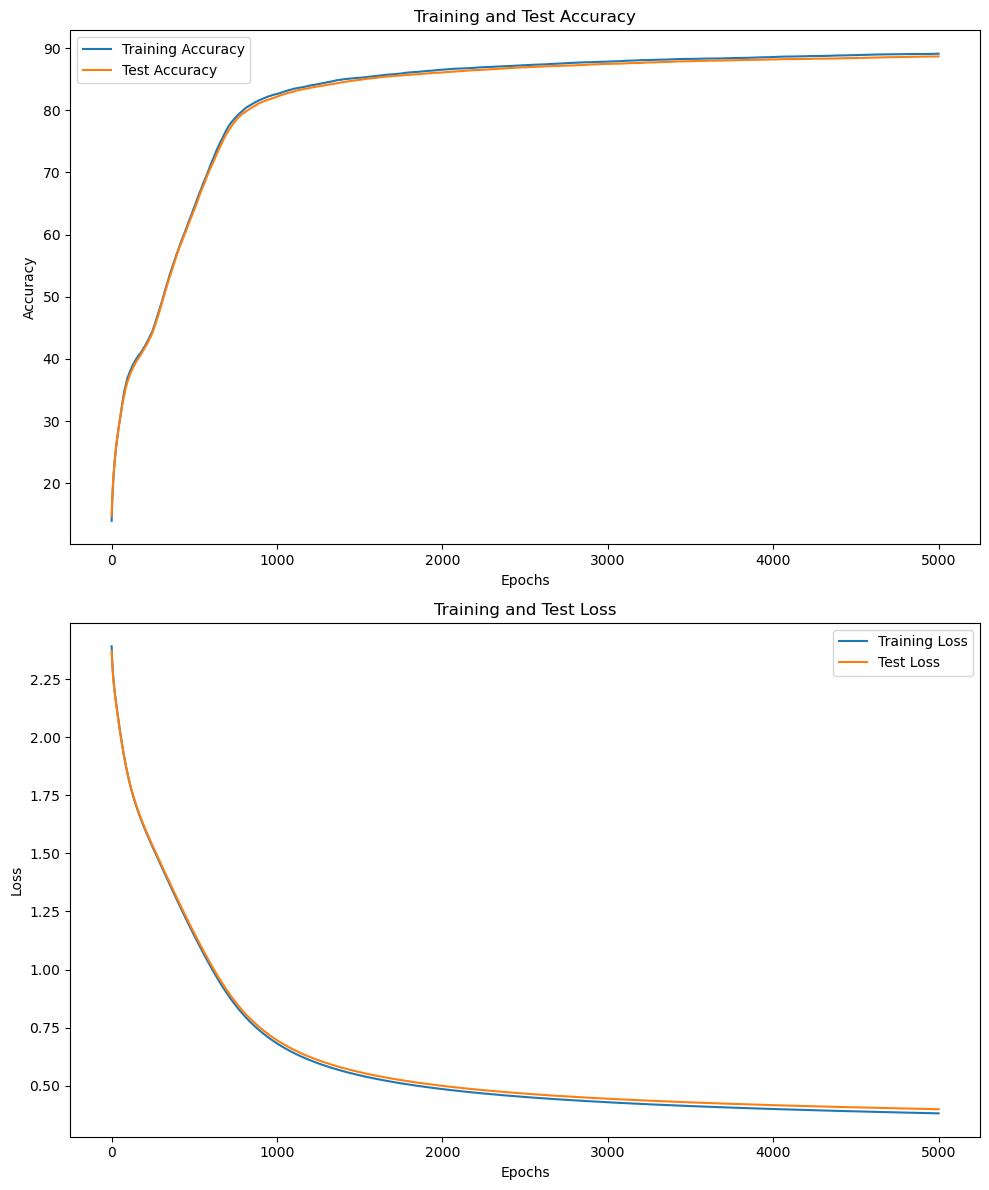

Test Accuracy: 88.66857142857143%


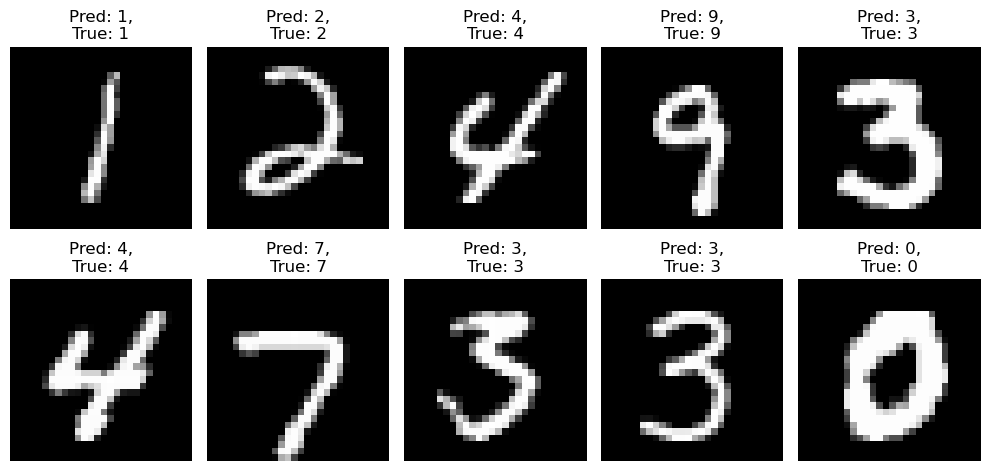

In [33]:
w1, b1, w2, b2 = gradient_descent(X_train, y_train, X_test, y_test, epochs=5000, alpha=0.01)

test_predictions = predict(X_test, w1, b1, w2, b2)
accuracy = get_accuracy(test_predictions, y_test)
print(f"Test Accuracy: {accuracy}%")

# 10 random samples from the data set and their true and predicted labels 
random_indices = np.random.choice(len(X_test), size=10, replace=False)
plot_images(X_test[random_indices], test_predictions[random_indices], y_test[random_indices])